# Reverse time migration example on a 2D  acoustic model

## Set up environment.

In [1]:
from ipyparallel import Client
c = Client(profile='mpi')
dview = c[:]

with dview.sync_imports():
    import sys
    import numpy
    from examples.acoustic import demo_toolkit
    from examples.acoustic.Acoustic_codegen import Acoustic_cg

# Setup figure size
%matplotlib inline

import matplotlib.pyplot as plt
fig_size = [0, 0]
fig_size[0] = 18
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size

importing sys on engine(s)
importing numpy on engine(s)
importing demo_toolkit from examples.acoustic on engine(s)
importing Acoustic_cg from examples.acoustic.Acoustic_codegen on engine(s)


## Load synthetic velocity model.

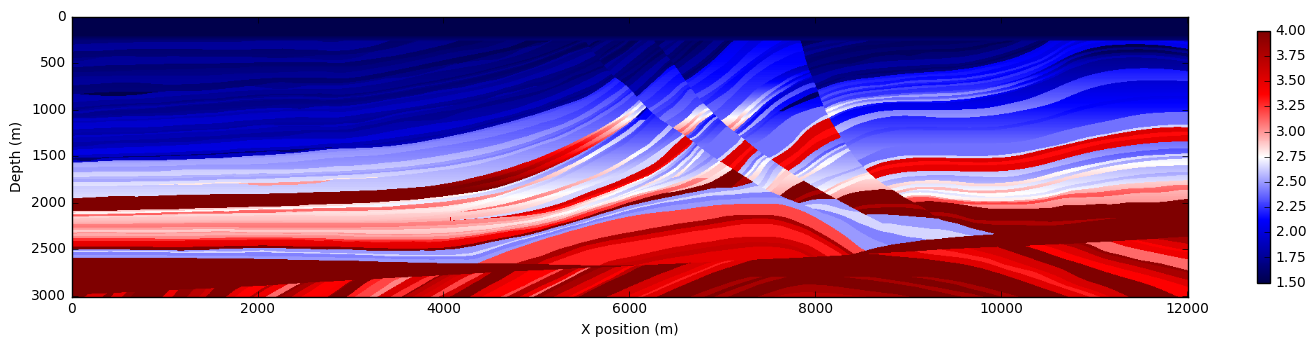

In [2]:
demo = demo_toolkit.marmousi2D()
model = demo.get_true_model()

demo.plot_velocity(model.vp)

## Create "initial guess" by smoothening the synthetic velocity model.

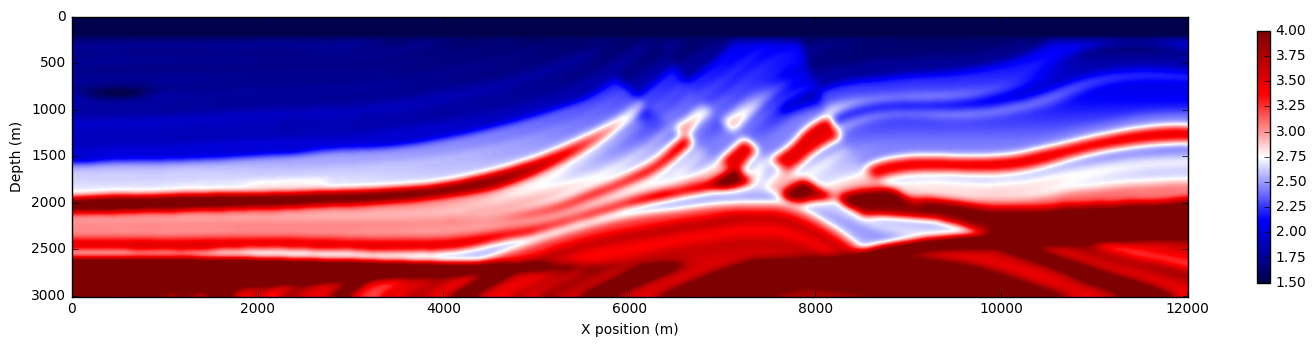

In [3]:
model0 = demo.get_initial_model()
demo.plot_velocity(model0.vp)

## Example of a shot record

In [4]:
# %load_ext snakeviz

In [5]:
# %%snakeviz
data, rec = demo.get_shot(50)

# Create acoustic modelling kernel.
Acoustic = Acoustic_cg(model0, data, t_order=2, s_order=10)

# Execute acoustic forward model.
rec0, u, gflopss, oi, timings = Acoustic.Forward(save=False, cse=True)

demo.plot_record(rec0)

Rewriter: 62 --> 47 flops (Gain: 1.32 X)


TypeError: unsupported operand type(s) for +: 'dict_values' and 'list'

## RTM loop

In [ ]:
# %%snakeviz
def grad_shot(i):
    demo = demo_toolkit.marmousi2D()

    model0 = demo.get_initial_model()
    data, rec = demo.get_shot(i)

    Acoustic0 = Acoustic_cg(model0, data, t_order=2, s_order=4)
    rec0, u0, gflopss, oi, timings = Acoustic0.Forward(save=True, cse=True)

    # Return gradient
    return Acoustic0.Gradient(rec0 - rec, u0, cache_blocking=None)

# grads = dview.map(grad_shot, range(8))
grads = map(grad_shot, range(8))

grad = sum(grads)

In [ ]:
demo.plot_rtm(grad)
# print(grad)